In [1]:
import collections
import os
import subprocess
import math
from decimal import *
import re
import sys
import matplotlib.pyplot as plt
import numpy as np  # standard numeric lib
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt

In [2]:
def rd_moleculeOrdering(infile,HomeDirName): # can use this to interate over the appropriate directories
    if os.getcwd() != HomeDirName:
        os.chdir(HomeDirName)

    moleculeOrder=[]
    with open(infile, 'r') as filehandle:
        fileContent=filehandle.readlines()
        for line in fileContent:
            if "!" in line: #omits comments in text file
                continue
            print(line)
            line=line.strip('\n')
            moleculeOrder.append(line)
            
    return moleculeOrder

In [3]:
cwd=os.getcwd()
moleculeOrder=rd_moleculeOrdering('paper_Ordering.txt',cwd)#'/Users/zacharywindom/Desktop/research/spring2020/fermiContactPlot/transitionMetals')
print(moleculeOrder)

BO

BeF

BeH

CH

CO+ 

Cl2-

OH

SH

BH$_2$

BeOH

CH2

CH2-

C2H

HCO

HCS

HOO

H2O+

NH2

CH3

F2CH

H2CN

NH3+

PH3+

CH2CH

H2CCN

C2CCO+



['BO', 'BeF', 'BeH', 'CH', 'CO+ ', 'Cl2-', 'OH', 'SH', 'BH$_2$', 'BeOH', 'CH2', 'CH2-', 'C2H', 'HCO', 'HCS', 'HOO', 'H2O+', 'NH2', 'CH3', 'F2CH', 'H2CN', 'NH3+', 'PH3+', 'CH2CH', 'H2CCN', 'C2CCO+', '']


In [4]:
def rd_exp_FC(infile):
    exp_Results=[]
    moleculeInfo=[]
    with open(infile, 'r') as filehandle:
        fileContent=filehandle.readlines()
        
        for line in fileContent:
            if "!" in line: #omits comments in text file
                continue
            print(line)
            if line.strip():
                #print("newline")
                line=line.strip('\n')
                line=line.split()
                #print("indivi line is: ", line)
                moleculeInfo.append(line)
                #print("moleculeInfo ", moleculeInfo)
            elif not line.strip():
                exp_Results.append(moleculeInfo)
                moleculeInfo=[]
                
        exp_Results.append(moleculeInfo)
    return exp_Results
    

In [5]:
tmp =rd_exp_FC('correctEXP_data.txt')
print(len(tmp))


B	1024.9

O	14.0



Be	294.0

F	229.0



Be	199.3

H	193.9



H	57.7

C	47.1



C	1573.0

O	18.5



Cl	109.0



O	51.3

H	71.5



H	65.0



B	357.9

H	38.0



Be	264.0

H	1.9



H	20.2



C	58.9

H	44.8



C	213.0

C	1014.5

H	50.4



C	377.5

H	354.0

O	42.3



H	127.5



H	27.4



O	83.2

H	73.1



H	67.2

N	27.9



C	75.7

H	70.1



C	417.0

F	236.0

H	62.2



C	81.0

H	233.2

N	25.8



N	54.9

H	76.8



P	1176

H	1.7



C	24.0

C	301.5

H	192.0

H	95.8

H	37.3



H	58.8

N	9.8



H	58.0



27


In [6]:
tmp =rd_exp_FC('correctEXP_data.txt')
print(tmp)
tmp[1][0][1]
tmp[1][0][0]
print(len(tmp))


B	1024.9

O	14.0



Be	294.0

F	229.0



Be	199.3

H	193.9



H	57.7

C	47.1



C	1573.0

O	18.5



Cl	109.0



O	51.3

H	71.5



H	65.0



B	357.9

H	38.0



Be	264.0

H	1.9



H	20.2



C	58.9

H	44.8



C	213.0

C	1014.5

H	50.4



C	377.5

H	354.0

O	42.3



H	127.5



H	27.4



O	83.2

H	73.1



H	67.2

N	27.9



C	75.7

H	70.1



C	417.0

F	236.0

H	62.2



C	81.0

H	233.2

N	25.8



N	54.9

H	76.8



P	1176

H	1.7



C	24.0

C	301.5

H	192.0

H	95.8

H	37.3



H	58.8

N	9.8



H	58.0



[[['B', '1024.9'], ['O', '14.0']], [['Be', '294.0'], ['F', '229.0']], [['Be', '199.3'], ['H', '193.9']], [['H', '57.7'], ['C', '47.1']], [['C', '1573.0'], ['O', '18.5']], [['Cl', '109.0']], [['O', '51.3'], ['H', '71.5']], [['H', '65.0']], [['B', '357.9'], ['H', '38.0']], [['Be', '264.0'], ['H', '1.9']], [['H', '20.2']], [['C', '58.9'], ['H', '44.8']], [['C', '213.0'], ['C', '1014.5'], ['H', '50.4']], [['C', '377.5'], ['H', '354.0'], ['O', '42.3']], [['H', '127.5']], [['H', '27.4']], [['O', '83.2'

In [7]:
def rdAtomCount(infile):
    atomCount=[]
    with open(infile, 'r') as filehandle:
        fileContent=filehandle.readlines()
        for line in fileContent:
            if "!" in line: #omits comments in text file
                continue
            print(line)
            atomCount.append(int(line))
                
    return atomCount
    


In [8]:
rdAtomCount('atomCount.txt')

2

2

2

2

2

1

2

1

2

2

1

2

3

3

1

1

2

2

2

3

3

2

2

5

2

1



[2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 3, 3, 2, 2, 5, 2, 1]

In [9]:
a=rd_exp_FC('final_camb3lypFC.txt')


0B	1099.9063

1O	-13.0532



0Be	-299.9346

1F	252.9593



0Be	-199.9120

1H	188.4796



0H	-49.8942

1C	43.7910



0C	1630.1067

1O	27.7801



0Cl	98.2451

1Cl	98.2451



0O	-39.0239

1H	-66.9878



0H	-38.6430

1S	8.1708



0B	354.1494

1H	42.4759

2H	42.4759



0Be	-271.4652

1O	-53.3568

2H	3.0492



0C	68.5748

1H	-39.4867

2H	-39.4867



0C	236.7521

1C	1068.1087

2H	56.4876



0C	288.5736

1H	133.8103

2S	9.3485



0H	-20.9828

1O	-42.8845

2O	-26.7515



0O	-60.6681

1H	-71.1213

2H	-71.1213



0H	-61.4162

1H	-61.4162

2N	25.2296



0C	73.9109

1H	-65.5083

2H	-65.5086

3H	-65.5079



0C	403.8759

1F	217.3328

2F	217.2950

3H	69.5405



0C	-71.3589

1H	229.6745

2H	229.6747

3N	21.2809



0N	39.2959

1H	-76.1436

2H	-76.1434

3H	-76.1434



0P	1062.1915

1H	15.1347

2H	15.1868

3H	15.1786



0C	-12.4760

1C	313.5421

2H	175.9521

3H	111.8112

4H	54.3307



0C	67.8117

3C	-64.1053

1H	-60.9792

2H	-60.9777

4N	9.0605



0C	61.6924

3C	-56.1924

1H	-59.4296

2H	-59.4714

4O	-15.

In [10]:
def atomOrderCheck(atomLabelList, infileLabelList):
    if len(atomLabelList)==len(infileLabelList):
        for i in range(len(atomLabelList)):
            if atomLabelList[i]==infileLabelList[i]:
                #print('nothing wrong here')
                continue
            else:
                print("MisMatch in atom ordering for the molecule ",atomLabelList)
    else:
        print("Viewing wrong molecule, ie ", atomLabelList, "and ", infileLabelList)

In [11]:
def plot_error(lista,listb):
    if len(lista)!=len(listb):
        print("lengths incompatible")
    error_list=[]
    for i in range(len(lista)):
        error_list.append(abs(lista[i])-abs(listb[i]))
    
    return error_list

def meanDeviation(expFC, calculatedFC):
    md=0.0
    for i in range(len(expFC)):
        md=md+(abs(expFC[i])-abs(calculatedFC[i]))
        
    return md/len(expFC)

def meanABSDeviation(expFC, calculatedFC):
    md=0.0
    for i in range(len(expFC)):
        md=md+(abs(abs(expFC[i])-abs(calculatedFC[i])))
    return md/len(expFC)

def plot(expFC, calculatedFC,title):
    cwd=os.getcwd()
    x11=np.linspace(1,2000,2000)
    slope, intercept, r_value, p_value, std_err = stats.linregress(expFC, calculatedFC)
    
    plt.plot(x11,intercept+slope*x11,label='$R^2$='+str(r_value))
    print('*****************************************')
    print("DFT Functional: ", title)
    print("R squared value is: ",r_value)
    print("Mean Error: ",meanDeviation(expFC, calculatedFC))
    print("Mean ABS Error: ",meanABSDeviation(expFC, calculatedFC))
    print("Mean Absolute Error: ",mean_absolute_error(expFC, calculatedFC))
    rms = sqrt(mean_squared_error(expFC, calculatedFC))
    print("RMS value is: ", rms)
    print("Intercept is: ", intercept)
    print("Slope is: ", slope)
    print('*****************************************')
    plt.plot(expFC,calculatedFC,'ro',label='Raw data-RMS:'+str(rms))
    plt.xlim(-10,2500)
    plt.ylim(-10,2500)
    plt.xlabel("Exp. FC (MHz)")
    plt.ylabel("Calculated FC (MHz)")
    plt.title(title)
    plt.legend()
    plt.savefig(cwd+'/'+title+'.eps', format='eps', dpi=1000)
    plt.show()
    #plt.savefig('/Users/zacharywindom/Desktop/work/spring19/research/fermi_contact/runs/run/testDir/'+title+'.eps', format='eps', dpi=1000)

def main(homePath):
    global qtp00_error, qtp01_error,qtp02_error,camb3lyp_error,lcblyp_error,wb97x_error
    global mo62x_error, pbe0_error, pbe_error, TPSSh_error, b3lyp_error 
    global ccsdt_error,ccsd_error
    global moleculeOrder,molDirNames
    if os.getcwd() != homePath:
        os.chdir(homePath)
    currentDir=os.getcwd()
    print(currentDir)
    #molDirNames=rd_moleculeOrdering('mol_name.txt',currentDir) #get molecular names: ie BH2
    moleculeOrder=rd_moleculeOrdering('paper_Ordering.txt',currentDir) #get expanded molecule names for FC: ie BHH
    expRefData=rd_exp_FC('correctEXP_data.txt')
    camb3lyp_vars=rd_exp_FC('correctCAMB3LYP.txt')
    qtp00_vars=rd_exp_FC('correctQTP00.txt')
    qtp01_vars=rd_exp_FC('correctQTP01.txt')
    qtp02_vars=rd_exp_FC('correctQTP02.txt')
    ccsdt_vars=rd_exp_FC('correctCCSDT.txt')
    ccsd_vars=rd_exp_FC('correctCCSD.txt')

    
    atomCount=rdAtomCount('atomCount.txt')
    
    
    #ccsdtRefData=rd_exp_FC('exp_CCSDT_data.txt')
    print("molecule ordering: ", moleculeOrder)
    qtp00FC=[]
    qtp01FC=[]
    qtp02FC=[]
    camb3lypFC=[]
    wb97xFC=[]
    lcblypFC=[]
  
    exp_data=[]
    ccsdt_data=[]
    ccsd_data=[]
    counter=0
    # testSet is the number of molecules in cwd from which we need to analyze FC info: MUST DEFINE THIS QUANTITY
    for i in range(26):  #testSet: #iterates over FC molecules
        maxAtomCount=atomCount[i]
        for j in range(maxAtomCount): #iterates over the atoms within one FC molecule
            exp_data.append(abs(float(expRefData[i][j][1])))
            camb3lypFC.append(abs(float(camb3lyp_vars[i][j][1]))) 
            qtp00FC.append(abs(float(qtp00_vars[i][j][1])))
            qtp01FC.append(abs(float(qtp01_vars[i][j][1])))
            qtp02FC.append(abs(float(qtp02_vars[i][j][1])))
            ccsdt_data.append(abs(float(ccsdt_vars[i][j][1])))
            ccsd_data.append(abs(float(ccsd_vars[i][j][1])))
            

            
    plot(exp_data,qtp00FC,"QTP00")
    plot(exp_data,camb3lypFC,"CAM-B3lyp")
    
    plot(exp_data,qtp01FC,"QTP01")
    plot(exp_data,qtp02FC,"QTP02")
    plot(exp_data,ccsdt_data, "control")
    plot(exp_data,ccsd_data,"CCSD")
    

    camb3lyp_error=plot_error(camb3lypFC,exp_data)
    qtp00_error=plot_error(qtp00FC,exp_data)
    qtp01_error=plot_error(qtp01FC,exp_data)
    qtp02_error=plot_error(qtp02FC,exp_data)
    ccsdt_error=plot_error(ccsdt_data,exp_data)
    ccsd_error=plot_error(ccsd_data,exp_data)

    
#    ccsdt_error=plot_error(ccsdt_data,exp_data)
#    print('qtp00 errors:',qtp00_error)
    
    

/Users/zacharywindom/Dropbox/FermiContactPaper/plots/smallMolecules/comparisonRSH_CC/revisedCC
BO

BeF

BeH

CH

CO+ 

Cl2-

OH

SH

BH$_2$

BeOH

CH2

CH2-

C2H

HCO

HCS

HOO

H2O+

NH2

CH3

F2CH

H2CN

NH3+

PH3+

CH2CH

H2CCN

C2CCO+



B	1024.9

O	14.0



Be	294.0

F	229.0



Be	199.3

H	193.9



H	57.7

C	47.1



C	1573.0

O	18.5



Cl	109.0



O	51.3

H	71.5



H	65.0



B	357.9

H	38.0



Be	264.0

H	1.9



H	20.2



C	58.9

H	44.8



C	213.0

C	1014.5

H	50.4



C	377.5

H	354.0

O	42.3



H	127.5



H	27.4



O	83.2

H	73.1



H	67.2

N	27.9



C	75.7

H	70.1



C	417.0

F	236.0

H	62.2



C	81.0

H	233.2

N	25.8



N	54.9

H	76.8



P	1176

H	1.7



C	24.0

C	301.5

H	192.0

H	95.8

H	37.3



H	58.8

N	9.8



H	58.0



0B	1099.9063

1O	-13.0532



0Be	-299.9346

1F	252.9593



0Be	-199.9120

1H	188.4796



0H	-49.8942

1C	43.7910



0C	1630.1067

1O	27.7801



0Cl	98.2451



0O	-39.0239

1H	-66.9878



0H	-38.6430



0B	354.1494

1H	42.4759



0Be	-271.4652

2H	3.0492



2H

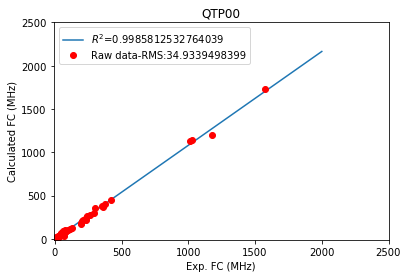

*****************************************
('DFT Functional: ', 'CAM-B3lyp')
('R squared value is: ', 0.9972320280801361)
('Mean Error: ', -0.7092075471698134)
('Mean ABS Error: ', 13.892675471698116)
('Mean Absolute Error: ', 13.89267547169812)
('RMS value is: ', 24.199074450404648)
('Intercept is: ', -2.6859464408078964)
('Slope is: ', 1.0171709682105843)
*****************************************


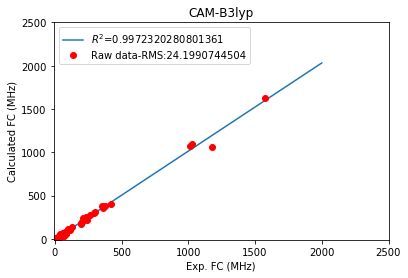

*****************************************
('DFT Functional: ', 'QTP01')
('R squared value is: ', 0.9966957601051091)
('Mean Error: ', 0.1942169811320747)
('Mean ABS Error: ', 14.460333962264148)
('Mean Absolute Error: ', 14.460333962264144)
('RMS value is: ', 26.635983111144387)
('Intercept is: ', -4.228316615793091)
('Slope is: ', 1.0204024314745015)
*****************************************


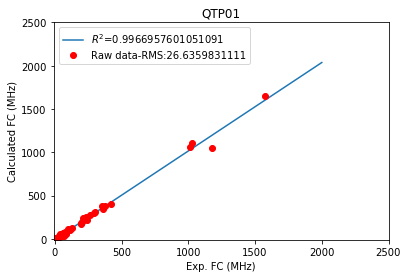

*****************************************
('DFT Functional: ', 'QTP02')
('R squared value is: ', 0.9967972531715069)
('Mean Error: ', -2.8273377358490537)
('Mean ABS Error: ', 14.389488679245282)
('Mean Absolute Error: ', 14.389488679245282)
('RMS value is: ', 27.914704250603823)
('Intercept is: ', -3.7295603490507574)
('Slope is: ', 1.0331614674841063)
*****************************************


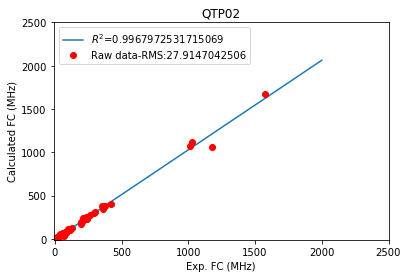

*****************************************
('DFT Functional: ', 'control')
('R squared value is: ', 0.9994409040163137)
('Mean Error: ', 2.400112264150944)
('Mean ABS Error: ', 6.827266603773585)
('Mean Absolute Error: ', 6.8272666037735865)
('RMS value is: ', 11.217042844339714)
('Intercept is: ', 0.011237483205405852)
('Slope is: ', 0.9878046150474846)
*****************************************


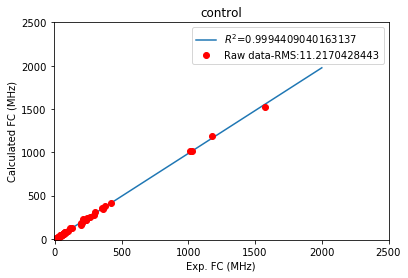

*****************************************
('DFT Functional: ', 'CCSD')
('R squared value is: ', 0.9994975845253383)
('Mean Error: ', -2.0140356603773566)
('Mean ABS Error: ', 8.827499811320754)
('Mean Absolute Error: ', 8.82749981132075)
('RMS value is: ', 12.612917115683276)
('Intercept is: ', -2.6181338807478483)
('Slope is: ', 1.0234271659601732)
*****************************************


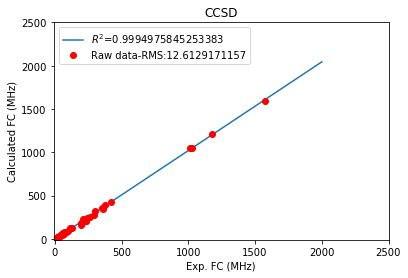

[75.00630000000001, -0.9467999999999996, 5.934599999999989, 23.959300000000013, 0.6119999999999948, -5.420400000000001, -7.805800000000005, -3.3090000000000046, 57.106700000000046, 9.280100000000001, -10.754900000000006, -12.2761, -4.512200000000007, -26.357, -3.750599999999963, 4.475900000000003, 7.465199999999982, 1.1492, -9.2913, 9.674799999999998, -5.313299999999998, 23.752100000000013, 53.6087, 6.087600000000002, 6.799599999999998, 26.261000000000024, -6.004300000000001, 6.310300000000012, -6.417199999999998, -22.5319, -1.9786999999999892, -5.783799999999999, -2.670399999999997, -1.7891000000000048, -4.591699999999989, -13.124099999999999, -18.66720000000001, 7.340499999999992, -9.641099999999994, -3.525499999999994, -4.519100000000002, -15.604099999999995, -0.6563999999999908, -113.8085000000001, 13.434700000000001, -11.524, 12.042100000000005, -16.0479, 16.011200000000002, 17.030700000000003, 2.1777000000000015, -0.7395000000000014, 1.4296000000000006]


In [12]:
cwd=os.getcwd()
homePath=cwd
main(homePath)
print(camb3lyp_error)


/Users/zacharywindom/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


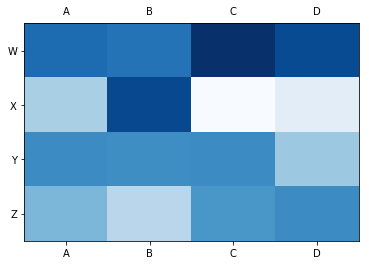

In [13]:
column_labels = list('ABCD')
row_labels = list('WXYZ')
data = np.random.rand(4, 4)
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(data.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(data.shape[0]) + 0.5, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.tick_params(labelbottom='on',labeltop='on')
#ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()

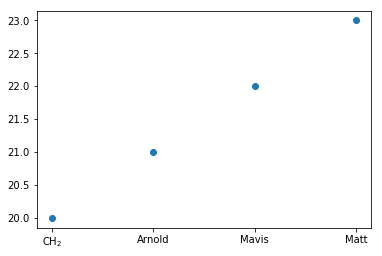

[29.84999999999991, -3.1959, -14.134999999999991, -19.566000000000003, -10.584000000000003, -10.599000000000018, 2.644999999999996, -6.324300000000001, 23.029999999999973, 4.891400000000001, 18.093000000000004, -0.42019999999999413, 5.553100000000001, -11.312800000000003, -8.058999999999969, -3.309100000000001, -10.608000000000004, 0.3906900000000002, 2.664999999999999, 9.322300000000006, 1.3504000000000005, 11.655000000000001, 35.22000000000003, 4.393999999999998, 10.855000000000018, 5.9599999999999795, 2.1041000000000025, -4.390000000000001, -4.5441, -1.9619, 7.005900000000011, 3.231499999999997, 0.38750000000000284, 1.4946999999999946, 3.8862000000000023, 10.73599999999999, 7.217000000000013, -5.5075, 0.5819999999999936, -20.881, 0.6154000000000011, -7.803199999999997, 8.671800000000005, 36.799999999999955, -0.6852, -6.064599999999999, 20.88499999999999, -30.605999999999995, 0.4001999999999981, 0.5519000000000034, 8.710000000000008, 0.03059999999999974, 8.116]


In [14]:
#https://stackoverflow.com/questions/20532614/multiple-lines-of-x-tick-labels-in-matplotlib
#https://stackoverflow.com/questions/3100985/plot-with-custom-text-for-x-axis-points
#https://pythonspot.com/matplotlib-scatterplot/
x = np.array([0,1,2,3])
y = np.array([20,21,22,23])
my_xticks = ['CH$_2$','Arnold','Mavis','Matt']
plt.xticks(x, my_xticks)
plt.plot(x, y,'o')
plt.show()
print(ccsd_error)

0
0
1
1
2
2
3
3
4
4
5
6
6
7
8
8
9
9
10
11
11
12
12
12
13
13
13
14
15
16
16
17
17
18
18
19
19
19
20
20
20
21
21
22
22
23
23
23
23
23
24
24
25
[0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.25, 5.0, 5.5, 6.25, 7.0, 7.5, 8.25, 9.25, 10.25, 10.75, 11.25, 12.0, 12.75, 13.5, 14.5, 15.5, 16.25, 17.0, 18.5, 19.25]
('xtick:', 53)
('camb3lyp error', 53)
('xtick_minor: ', [0.0, 0.75, 1.5, 2.25, 3.0, 3.75, 4.25, 5.0, 5.5, 6.25, 7.0, 7.5, 8.25, 9.25, 10.25, 10.75, 11.25, 12.0, 12.75, 13.5, 14.5, 15.5, 16.25, 17.0, 18.5, 19.25, 19.75])
(Text(0,0,'B'), 0.0)
(Text(0,0,'O'), 0.0)
(Text(0,0,'Be'), 0.0)
(Text(0,0,'F'), 0.0)
(Text(0,0,'Be'), 0.0)
(Text(0,0,'H'), 0.0)
(Text(0,0,'H'), 0.0)
(Text(0,0,'C'), 0.0)
(Text(0,0,'C'), 0.0)
(Text(0,0,'O'), 0.0)
(Text(0,0,'Cl'), 0.0)
(Text(0,0,'O'), 0.0)
(Text(0,0,'H'), 0.0)
(Text(0,0,'H'), 0.0)
(Text(0,0,'B'), 0.0)
(Text(0,0,'H'), 0.0)
(Text(0,0,'Be'), 0.0)
(Text(0,0,'H'), 0.0)
(Text(0,0,'H'), 0.0)
(Text(0,0,'C'), 0.0)
(Text(0,0,'H'), 0.0)
(Text(0,0,'C'), 0.0)
(Text(0,0,'C'), 0

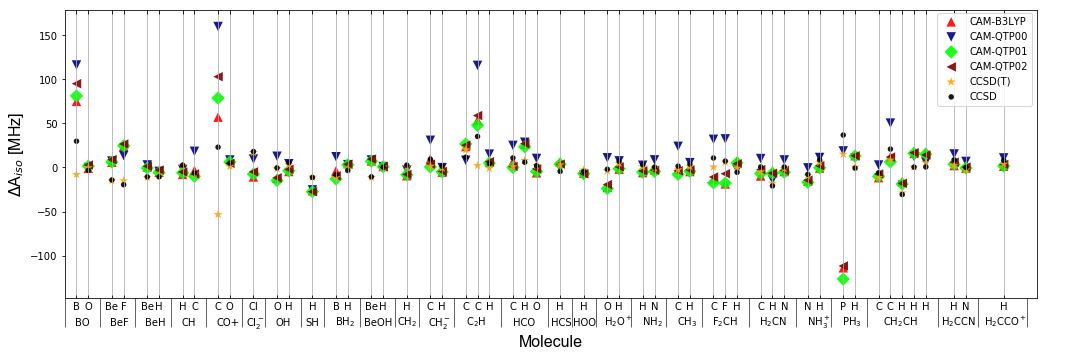

In [15]:
xlbls=[]
origin=0.0
xticks=[]
xticks_minor=[]

va=[]
moleculeOrderPos=[]
for i in range(len(tmp)-1):
    xticks_minor.append(origin)
    moleculeOrderPos.append(origin)
    origin=origin+0.25
    molLabelCount=origin

    for j in range(len(tmp[i])):
        print(i)
        xlbls.append(tmp[i][j][0])
        xticks.append(origin)
        if len(tmp[i]) == 0:
            moleculeOrderPos.append(origin) # Molecule Name label position
            origin=origin+0.25
#        if j == len(tmp[i])-1:
#            origin=origin+0.15
        else:
            origin=origin+0.25
            molLabelCount=molLabelCount+origin
        va.append(0.0)
xticks_minor.append(origin)    


print(moleculeOrderPos)
print('xtick:',len(xticks))
print('camb3lyp error',len(camb3lyp_error))
print('xtick_minor: ',xticks_minor)
#for i in range(len(tmp)-1):
#    print(i)
#    xlbls.append(tmp[i][0][0])
#    xticks.append(origin)
#    origin=origin+0.25
#    va.append(0.0)
    
#xticks=[0.0, 0.63, 1.26, 1.89, 2.52, 3.15, 3.57, 4.2, 4.62, 5.25, 5.88, 6.3, 6.93, 7.77, 8.610000000000001, 9.030000000000003, 9.450000000000005, 10.080000000000007, 10.71000000000001, 11.340000000000012, 12.180000000000016, 13.02000000000002, 13.650000000000022, 14.280000000000024, 15.54000000000003, 16.17000000000003]  
xticks[-3]=xticks[-3]+0.1
xticks[-2]=xticks[-2]+0.1
xticks[-1]=xticks[-1]+0.4

#xticks_minor=[0.0, 0.63, 1.26, 1.89, 2.52, 3.15, 3.57, 4.2, 4.62, 5.25, 5.88, 6.3, 6.93, 7.77, 8.610000000000001, 9.030000000000003, 9.450000000000005, 10.080000000000007, 10.71000000000001, 11.340000000000012, 12.180000000000016, 13.02000000000002, 13.650000000000022, 14.280000000000024, 15.54000000000003, 16.17000000000003, 16.590000000000032]
xticks_minor[-2]=xticks_minor[-2]+0.1
xticks_minor[-1]=xticks_minor[-1]+0.65


fig = plt.figure( figsize=(13.5, 4 ) ) #14
ax = fig.add_axes( [0,0,1,1 ] )
#ax.set_yticks( np.linspace(-240, 240, 11 ) )
#test_xtix=[3.0]



#xticks = [ 1.5, 3.5, 2.0, 6, 8, 10 ] # problem is here
#xticks_minor = [ 1, 5, 7, 9, 11 ]
#xlbls = [ 'C', 'CH$_2$', 'H',
#          'maximum day', '90th percentile day', 'average day' ]

ax.set_xticks( xticks )
ax.set_xticks( xticks_minor, minor=True ) # sets the separating/dividing bar
ax.set_xticklabels( xlbls ) # sets 'xlbls' to the x positions references in x ticks
ax.set_xlim( 0.0, 20.6 )

ax.grid( 'on', axis='x' ) # sets the vertical grid
ax.grid( 'off', axis='x', which='minor' )


#ax.text(10.05, -150, r' $E=mc^2$', fontsize=10)
#print('len of mole order: ',len(moleculeOrderPos))
#for i in range(len(moleculeOrderPos)-2):
#    print('molecule printing order is: ', moleculeOrder[i], 'with position: ',moleculeOrderPos[i])
#    ax.text(moleculeOrderPos[i], -185,moleculeOrder[i] , fontsize=10)
#    ax.text(moleculeOrderPos,-0.05, moleculeOrder[i],fontsize='large')
moleculeOrderPos[0]=moleculeOrderPos[0]+0.175
moleculeOrderPos[1]=moleculeOrderPos[1]+0.16
moleculeOrderPos[2]=moleculeOrderPos[2]+0.16
moleculeOrderPos[3]=moleculeOrderPos[3]+0.175
moleculeOrderPos[4]=moleculeOrderPos[4]+0.175
moleculeOrderPos[5]=moleculeOrderPos[5]+0.05
moleculeOrderPos[6]=moleculeOrderPos[6]+0.175
moleculeOrderPos[7]=moleculeOrderPos[7]+0.05
moleculeOrderPos[8]=moleculeOrderPos[8]+0.175
moleculeOrderPos[9]=moleculeOrderPos[9]+0.05
moleculeOrderPos[11]=moleculeOrderPos[11]+0.16
moleculeOrderPos[12]=moleculeOrderPos[12]+0.21
moleculeOrderPos[13]=moleculeOrderPos[13]+0.21
moleculeOrderPos[15]=moleculeOrderPos[15]-0.02
moleculeOrderPos[16]=moleculeOrderPos[16]+0.135
moleculeOrderPos[17]=moleculeOrderPos[17]+0.175
moleculeOrderPos[18]=moleculeOrderPos[18]+0.175
moleculeOrderPos[19]=moleculeOrderPos[19]+0.175
moleculeOrderPos[20]=moleculeOrderPos[20]+0.175
moleculeOrderPos[21]=moleculeOrderPos[21]+0.175
moleculeOrderPos[22]=moleculeOrderPos[22]+0.175
moleculeOrderPos[23]=moleculeOrderPos[23]+0.295
moleculeOrderPos[24]=moleculeOrderPos[24]+0.02
moleculeOrderPos[25]=moleculeOrderPos[25]+0.175
molecule_name=["BO", "BeF", "BeH", "CH","CO+","Cl$_2^-$", "OH","SH","BH$_2$","BeOH","CH$_2$", "CH$_2^-$","C$_2$H","HCO","HCS","HOO","H$_2$O$^+$","NH$_2$","CH$_3$","F$_2$CH","H$_2$CN","NH$_3^+$","PH$_3$","CH$_2$CH","H$_2$CCN","H$_2$CCO$^+$"]
count=0
for i in range(len(molecule_name)):
    pos=moleculeOrderPos[i]+0.05
    plt.text(pos,-179,molecule_name[i],fontsize=10)
        
# vertical alignment of xtick labels
#va = [ 0, -.05, 0, -.05, -.05, -.05 ] # vertical alginment: shifts the labels vertical position on x axis
for t, y in zip( ax.get_xticklabels( ), va ):
    print(t,y)
    t.set_y( y )


print('outsdie ',len(moleculeOrderPos))
for i in range(len(moleculeOrderPos)):
    print(moleculeOrder[i])
 #   plt.text(moleculeOrderPos,-0.05, moleculeOrder[i],fontsize='large')

ax.tick_params( axis='x', which='minor', direction='out', top='off',length=29 ) # sets the vertical separating bar
ax.tick_params( axis='x', which='major', direction='in',bottom='on', top='on' )
#ccsdt_error
ax.scatter(xticks, camb3lyp_error, alpha=0.9, c='r', marker='^',edgecolors='none', s=90,label='CAM-B3LYP')
ax.scatter(xticks, qtp00_error, alpha=0.9, c='navy',marker='v',edgecolors='none', s=90,label='CAM-QTP00')
ax.scatter(xticks, qtp01_error, alpha=0.9, c='lime',marker='D',edgecolors='none', s=90,label='CAM-QTP01')
ax.scatter(xticks, qtp02_error, alpha=0.9, c='maroon',  marker='<',edgecolors='none', s=90,label='CAM-QTP02')
ax.scatter(xticks, ccsdt_error, alpha=0.9, c='orange',  marker='*',edgecolors='none', s=90,label='CCSD(T)')
ax.scatter(xticks, ccsd_error, alpha=0.9, c='black',  marker='.',edgecolors='none', s=120,label='CCSD')
#ax.scatter(xticks, lcblyp_error, alpha=0.9, c='turquoise', marker='^',edgecolors='none', s=90,label='lc-BLYP')
#ax.scatter(xticks, wb97x_error, alpha=0.9, c='orange', marker='P',edgecolors='none', s=90,label='wB97x')
ax.legend(loc='upper right',bbox_to_anchor=(1.00, 1.01)) #1.105
ax.set_xlabel("Molecule",fontsize='16',fontname='Arial')
ax.set_ylabel("$\Delta$A$_{iso}$ [MHz]",fontsize='16',fontname='Arial')
plt.savefig('smallMoleculeComp.eps', format='eps', dpi=1000,bbox_inches = 'tight')



In [16]:


uniqueAtoms=[]
qtp00_uniError=[]
qtp01_uniError=[]
qtp02_uniError=[]
camb3lyp_uniError=[]
ccsdt_uniError=[]
counter=0
print("error array length is: ", len(qtp00_error))
for i in moleculeOrder:
    print("i is: ", i,"counter is: ", counter, "list of i is: ", list(i))
    tmp_list=[]
    if 'Be' in i:
        print("FOUND Be!!!!")
    for j in list(i):
        if not j.isupper(): # make sure only 
            tmp_list=[]
            tmp_list.append("Be")#HACKED ONLY FOR BERYLLIUM
            continue
        #print("counter: ", counter)
        if j not in tmp_list:
            print("j is::::", j)
            tmp_list.append(j)
            qtp00_uniError.append(qtp00_error[counter])
            qtp01_uniError.append(qtp01_error[counter])
            qtp02_uniError.append(qtp02_error[counter])
            camb3lyp_uniError.append(camb3lyp_error[counter])
            ccsdt_uniError.append(ccsdt_error[counter])
            
            print(j,counter)
        counter+=1
    uniqueAtoms=uniqueAtoms+tmp_list
            
print(uniqueAtoms)
moleculeNames=['$BH_2$', '$BO$', '$BeF$', '$BeH$', '$CH$', '$CH_2$', '$CH_2^-$', '$CH_3$', '$CO$', '$H_2O^+', '$NH_2$', '$NH_3$', '$OH$', 'BeOH', '$PH_3^+$', '$HOO$', '$C_2H$','$HCS$']
print(moleculeNames)
#print(qtp00_error)
#print(qtp00_uniError)
print("length of unique errors:", len(qtp00_uniError),len(uniqueAtoms))
x=np.arange(2,40,1)
print(x)
yy=np.arange(40,78,1)
fig = plt.figure( figsize=(18, 10 ) )


ax = fig.add_axes( [.05, .1, .9, .85 ] )
#ax.set_yticks( np.linspace(-100, 100, 10 ) ) ## WILL NEED TO RESET THIS

xticks = [ 1.25, 1.5, 2.0, 2.25,2.75,3.00,3.5,3.75,4.25,4.5,5.0,5.25,5.75,6.0,6.5,6.75,7.25,7.5,8.0,8.25,8.75,9.0,9.5,9.75,10.25,10.5] 

xticks_minor = [ 1, 1.75, 2.5,3.25,4.0,4.75,5.5,6.25,7.0,7.75,8.5,9.25,10.0,10.75 ]
xlbls = uniqueAtoms#[ 'C','H']
#test_xlbls=['CH$_2$','SH', 'BO', 'CO' ]

ax.set_xticks( xticks )
ax.set_xticks( xticks_minor, minor=True ) # sets the separating/dividing bar
ax.set_xticklabels( xlbls ) # sets 'xlbls' to the x positions references in x ticks
ax.set_xlim( 1, 10.75 )

ax.grid( 'on', axis='y' )
ax.grid( 'on', axis='x' ) # sets the vertical grid
ax.grid( 'off', axis='x', which='minor' )

# vertical alignment of xtick labels
va = [ 0, 0, 0, 0, 0, 0 ] # vertical alginment: shifts the labels vertical position on x axis
print(zip(ax.get_xticklabels()))
for t, y in zip( ax.get_xticklabels( ), va ):
    print(t,y)
    t.set_y( y )

#ax.set_xticks(test_xlbls)
#va=[-0.5, -.05, -.05, -.05 ]
#for t, y in zip( ax.get_xticklabels( ), va ):
#    print(t,y)
#    t.set_y( y )

ax.tick_params( axis='x', which='minor', direction='out', length=40 ) # sets the vertical separating bar
ax.tick_params( axis='x', which='major', direction='out',bottom='on', top='on' )
molecule_name=["BH$_2$", "BO", "BeF", "BeH", "CH", "CH$_2$", "CH$_2^-$","CH$_3$", "CO$^+$","H$_2$O$^+$","NH$_2$","NH$_3^+$","OH"]
count=0
for i in range(len(xticks)):
    if i%2==0:
        pos=xticks[i]+0.05
        plt.text(pos,-102.5,molecule_name[count],fontsize='large')
        count+=1
#plt.text(1.3, -102.5, '$CH_2^-$',fontsize='large')#rotation=-45,fontsize='large')
ax.set_xlabel("Molecules",fontsize='20',fontname='Arial')
ax.set_ylabel("$\Delta$A$_{iso}$ [MHz]",fontsize='20',fontname='Arial')
ax.scatter(xticks, qtp00_uniError, alpha=0.9, c='r', edgecolors='none', s=90,label='QTP-00')
print(x,yy)
ax.scatter(xticks, qtp01_uniError, alpha=0.9, c='b', marker='^',edgecolors='none', s=90,label='QTP-01')
ax.scatter(xticks, qtp02_uniError, alpha=0.9,  c='xkcd:fuchsia',marker='v',edgecolors='none', s=90,label='QTP-02')
ax.scatter(xticks, camb3lyp_uniError, alpha=0.9,c='xkcd:green',  marker='<',edgecolors='none', s=90,label='CAM-B3lyp')
ax.scatter(xticks, ccsdt_uniError, alpha=0.9,c='xkcd:black',  marker='P',edgecolors='none', s=90,label='CCSD(T)')
ax.legend()
plt.savefig('/Users/zacharywindom/Desktop/work/spring19/research/fermi_contact/runs/run/testDir/abserror_new.eps', format='eps', dpi=1000)
#ax.plot(x,x)





('error array length is: ', 53)
('i is: ', 'BO', 'counter is: ', 0, 'list of i is: ', ['B', 'O'])
('j is::::', 'B')
('B', 0)
('j is::::', 'O')
('O', 1)
('i is: ', 'BeF', 'counter is: ', 2, 'list of i is: ', ['B', 'e', 'F'])
FOUND Be!!!!
('j is::::', 'B')
('B', 2)
('j is::::', 'F')
('F', 3)
('i is: ', 'BeH', 'counter is: ', 4, 'list of i is: ', ['B', 'e', 'H'])
FOUND Be!!!!
('j is::::', 'B')
('B', 4)
('j is::::', 'H')
('H', 5)
('i is: ', 'CH', 'counter is: ', 6, 'list of i is: ', ['C', 'H'])
('j is::::', 'C')
('C', 6)
('j is::::', 'H')
('H', 7)
('i is: ', 'CO+ ', 'counter is: ', 8, 'list of i is: ', ['C', 'O', '+', ' '])
('j is::::', 'C')
('C', 8)
('j is::::', 'O')
('O', 9)
('i is: ', 'Cl2-', 'counter is: ', 10, 'list of i is: ', ['C', 'l', '2', '-'])
('j is::::', 'C')
('C', 10)
('i is: ', 'OH', 'counter is: ', 11, 'list of i is: ', ['O', 'H'])
('j is::::', 'O')
('O', 11)
('j is::::', 'H')
('H', 12)
('i is: ', 'SH', 'counter is: ', 13, 'list of i is: ', ['S', 'H'])
('j is::::', 'S')
('S

IndexError: list index out of range

In [ ]:
test=['aab','bba','ccc']
newlist=[]
for i in test:
    #i=i.split()
    tmp_list=[]
    for j in list(i):
        #tmp_list.append(j)
        if j not in tmp_list:
            tmp_list.append(j)
            print(j)
    newlist=newlist+tmp_list
            
print(newlist)

In [ ]:
print(molDirNames)
print(0%2)
print(1%2)
print(2%2)
print(3%2)

In [ ]:
#references:
# https://stackoverflow.com/questions/20532614/multiple-lines-of-x-tick-labels-in-matplotlib
# https://stackoverflow.com/questions/3100985/plot-with-custom-text-for-x-axis-points
# https://pythonspot.com/matplotlib-scatterplot/
# bar chart: https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py
# https://matplotlib.org/tutorials/introductory/pyplot.html

# marker info for plot:
# https://matplotlib.org/api/markers_api.html#module-matplotlib.markers
# https://matplotlib.org/users/colors.html
# https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size


uniqueAtoms=[]
mo62x_uniError=[]
pbe0_uniError=[]
pbe_uniError=[]
TPSSh_uniError=[]
b3lyp_uniError=[]
ccsdt_uniError=[]
counter=0
print("error array length is: ", len(qtp00_error))
for i in moleculeOrder:
    print("i is: ", i,"counter is: ", counter, "list of i is: ", list(i))
    tmp_list=[]
    if 'Be' in i:
        print("FOUND Be!!!!")
    for j in list(i):
        if not j.isupper(): # make sure only 
            tmp_list=[]
            tmp_list.append("Be")#HACKED ONLY FOR BERYLLIUM
            continue
        #print("counter: ", counter)
        if j not in tmp_list:
            print("j is::::", j)
            tmp_list.append(j)
            mo62x_uniError.append(mo62x_error[counter])
            pbe0_uniError.append(pbe0_error[counter])
            pbe_uniError.append(pbe_error[counter])
            TPSSh_uniError.append(TPSSh_error[counter])
            b3lyp_uniError.append(b3lyp_error[counter])
            ccsdt_uniError.append(ccsdt_error[counter])
            
            print(j,counter)
        counter+=1
    uniqueAtoms=uniqueAtoms+tmp_list
            
print(uniqueAtoms)
moleculeNames=['$BH_2$', '$BO$', '$BeF$', '$BeH$', '$CH$', '$CH_2$', '$CH_2^-$', '$CH_3$', '$CO$', '$H_2O^+', '$NH_2$', '$NH_3$', '$OH$']
print(moleculeNames)
#print(qtp00_error)
#print(qtp00_uniError)
print("length of unique errors:", len(qtp00_uniError),len(uniqueAtoms))
x=np.arange(2,40,1)
print(x)
yy=np.arange(40,78,1)
fig = plt.figure( figsize=(18, 10 ) )


ax = fig.add_axes( [.05, .1, .9, .85 ] )
#ax.set_yticks( np.linspace(-100, 100, 10 ) ) ## WILL NEED TO RESET THIS

xticks = [ 1.25, 1.5, 2.0, 2.25,2.75,3.00,3.5,3.75,4.25,4.5,5.0,5.25,5.75,6.0,6.5,6.75,7.25,7.5,8.0,8.25,8.75,9.0,9.5,9.75,10.25,10.5] 

xticks_minor = [ 1, 1.75, 2.5,3.25,4.0,4.75,5.5,6.25,7.0,7.75,8.5,9.25,10.0,10.75 ]
xlbls = uniqueAtoms#[ 'C','H']
#test_xlbls=['CH$_2$','SH', 'BO', 'CO' ]

ax.set_xticks( xticks )
ax.set_xticks( xticks_minor, minor=True ) # sets the separating/dividing bar
ax.set_xticklabels( xlbls ) # sets 'xlbls' to the x positions references in x ticks
ax.set_xlim( 1, 10.75 )

ax.grid( 'on', axis='y' )
ax.grid( 'on', axis='x' ) # sets the vertical grid
ax.grid( 'off', axis='x', which='minor' )

# vertical alignment of xtick labels
va = [ 0, 0, 0, 0, 0, 0 ] # vertical alginment: shifts the labels vertical position on x axis
print(zip(ax.get_xticklabels()))
for t, y in zip( ax.get_xticklabels( ), va ):
    print(t,y)
    t.set_y( y )

#ax.set_xticks(test_xlbls)
#va=[-0.5, -.05, -.05, -.05 ]
#for t, y in zip( ax.get_xticklabels( ), va ):
#    print(t,y)
#    t.set_y( y )

ax.tick_params( axis='x', which='minor', direction='out', length=40 ) # sets the vertical separating bar
ax.tick_params( axis='x', which='major', direction='out',bottom='on', top='on' )
molecule_name=["BH$_2$", "BO", "BeF", "BeH", "CH", "CH$_2$", "CH$_2^-$","CH$_3$", "CO$^+$","H$_2$O$^+$","NH$_2$","NH$_3^+$","OH"]
count=0
for i in range(len(xticks)):
    if i%2==0:
        pos=xticks[i]+0.05
        plt.text(pos,-157.5,molecule_name[count],fontsize='large')
        count+=1
#plt.text(1.3, -102.5, '$CH_2^-$',fontsize='large')#rotation=-45,fontsize='large')
ax.set_xlabel("Molecules",fontsize='20',fontname='Arial')
ax.set_ylabel("$\Delta$A$_{iso}$ [MHz]",fontsize='20',fontname='Arial')
ax.scatter(xticks, qtp00_uniError, alpha=0.9, c='r', edgecolors='none', s=90,label='QTP-00')
print(x,yy)
ax.scatter(xticks, mo62x_uniError, alpha=0.9, c='b', marker='^',edgecolors='none', s=90,label='M06-2x')
ax.scatter(xticks, pbe0_uniError, alpha=0.9,  c='xkcd:fuchsia',marker='s',edgecolors='none', s=90,label='PBE0')
ax.scatter(xticks, pbe_uniError, alpha=0.9,  c='xkcd:violet',marker='v',edgecolors='none', s=90,label='PBE')
ax.scatter(xticks, TPSSh_uniError, alpha=0.9,  c='xkcd:lime',marker='D',edgecolors='none', s=90,label='TPSSh')
ax.scatter(xticks, b3lyp_uniError, alpha=0.9,c='xkcd:green',  marker='<',edgecolors='none', s=90,label='B3lyp')
ax.scatter(xticks, ccsdt_uniError, alpha=0.9,c='xkcd:black',  marker='P',edgecolors='none', s=90,label='CCSD(T)')
ax.legend()
plt.savefig('/Users/zacharywindom/Desktop/work/spring19/research/fermi_contact/runs/run/testDir/abserror_2.eps', format='eps', dpi=1000)